# AIRLINES BOOKING VERI SETI BAGAJ TAHMİNİ

## *Veri seti ve proje Hakkında Bilgiler:*

Bu projede kullanılan Airlines Booking veri seti, bir havayolu firmasının uçuş rezervasyonlarına ilişkin detaylı bilgileri içermektedir. Veri setinde yolcu profilleri, uçuş tercihleri ve biletleme sürecine dair çeşitli değişkenler yer almaktadır. Bu proje kapsamında temel hedefimiz, her bir bilet alımında yolcunun ekstra bagaj satın alıp almadığını tahmin edebilen bir makine öğrenmesi modeli geliştirmektir. Bu sayede hem yolcu davranışlarını daha iyi anlayabilir hem de havayolu firmalarının kişiselleştirilmiş hizmet stratejileri geliştirmesine katkı sağlayabiliriz.

### ***Değişkenler***  
**num_passengers =** seyahat eden yolcu sayısı  
**sales_channel =** Satış platformu (internet & mobile)  
**trip_type =** Seyahat Türü (Gidiş Dönüş, Tek Yön, Dairesel Seyahat)  
**purchase_lead =** seyahat tarihi ile rezervasyon tarihi arasındaki gün sayısı  
**length_of_stay =** Hedefte geçirilen gün sayısı  
**flight_hour =** uçuş kalkış saati  
**flight_day =** uçuş kalkış günü  
**route =**  kalkış - varış uçuş rotası  
**booking_origin =** Rezervasyonun yapıldığı ülke  
**wants_extra_baggage =** Ekstra bagaj (0:istenmiyor, 1:isteniyor)  
**wants_preferred_seat =** Müşteri rezervasyonda tercih edilen bir koltuk istiyorsa (0:istenmiyor, 1:isteniyor)  
**wants_in_flight_meals =** Müşteri rezervasyonda uçak içi yemek istiyorsa (0:istenmiyor, 1:isteniyor)  
**flight_duration =** uçuşun toplam süresi (saat olarak)  
**booking_complete =** müşterinin rezervasyonu tamamlayıp tamamlamadığını gösterir

---

# VERİ İNCELEME VE KÜTÜPHANE İMPORT ETME

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, RandomizedSearchCV, GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("customer_booking.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R\x82union', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanma

In [6]:
df.num_passengers.value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

---

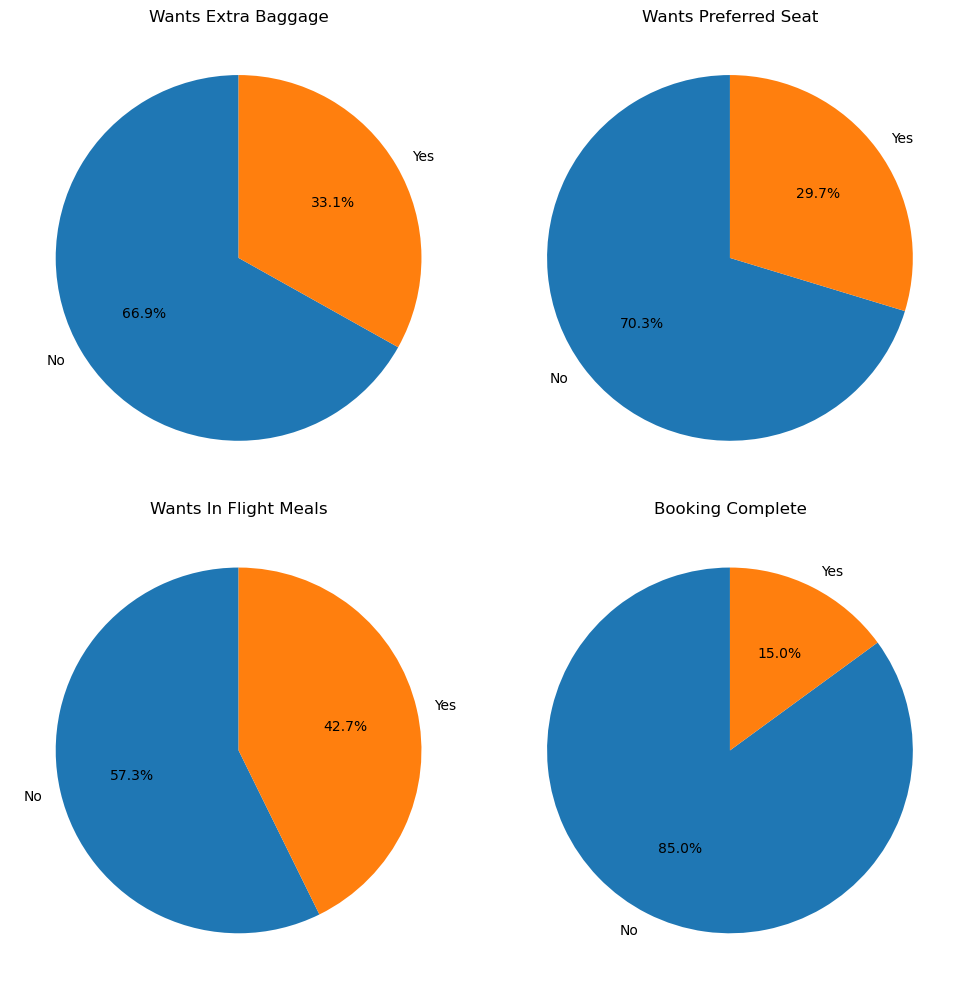

In [54]:
binary_columns = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(binary_columns):
    df[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'])
    axes[i].set_ylabel('')
    axes[i].set_title(f'{col.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of flight day')

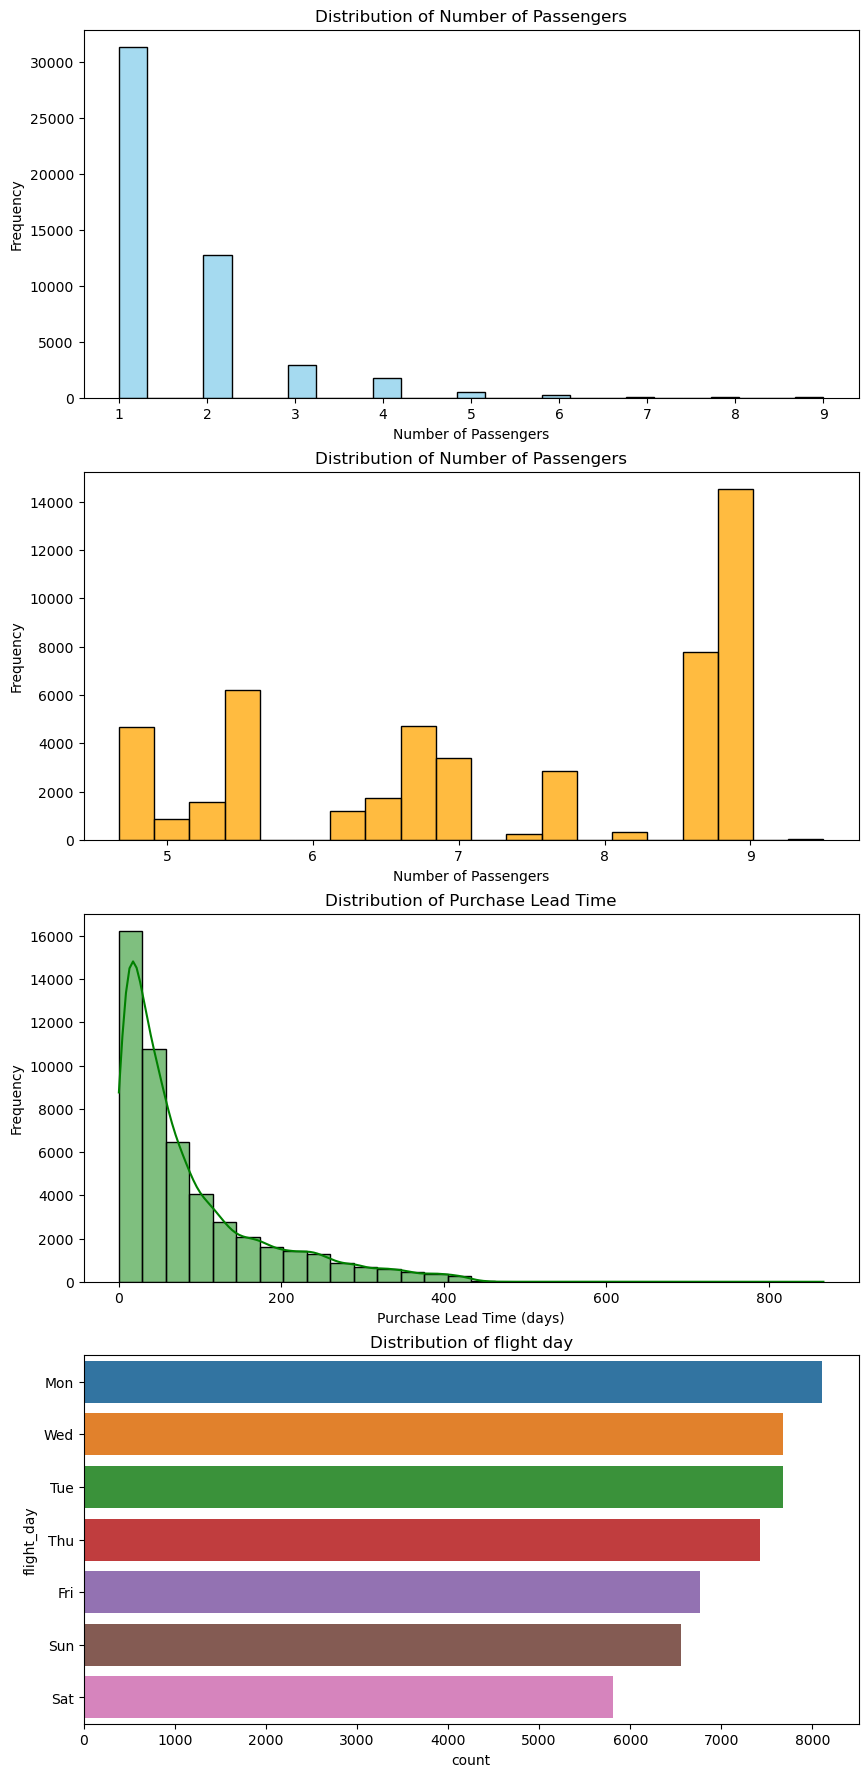

In [52]:
plt.figure(figsize=(10, 22))
plt.subplot(4,1,1)
sns.histplot(df['num_passengers'], bins=25, kde=False, color='skyblue')
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')

plt.subplot(4,1,2)
sns.histplot(df.flight_duration, bins=20, kde=False, color='orange')
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')

plt.subplot(4,1,3)
sns.histplot(df['purchase_lead'], bins=30, kde=True, color='green')
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Purchase Lead Time (days)')
plt.ylabel('Frequency')

plt.subplot(4,1,4)
sns.countplot(y=df.flight_day,order=df.flight_day.value_counts().index)
plt.title("Distribution of flight day")

Text(0.5, 1.0, 'Distribution of wants extra baggage')

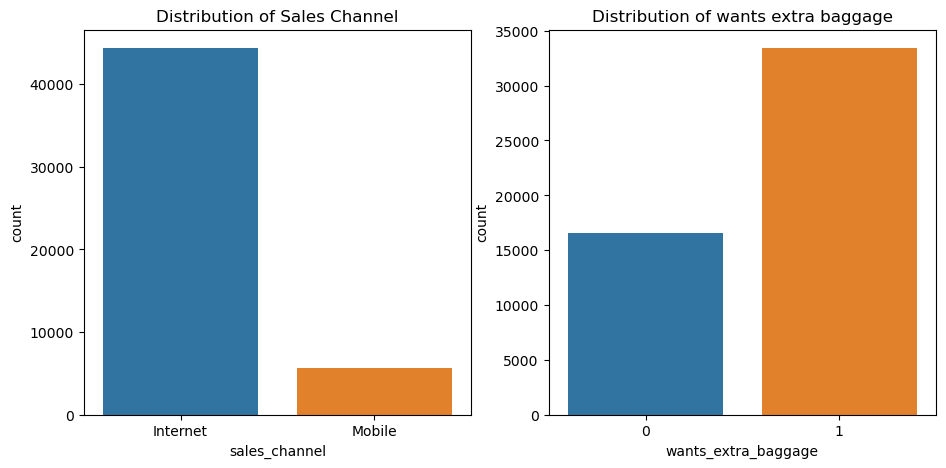

In [24]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(x=df.sales_channel)
plt.title('Distribution of Sales Channel')

plt.subplot(1,2,2)
sb.countplot(x=df.wants_extra_baggage)
plt.title("Distribution of wants extra baggage")

Text(0.5, 1.0, 'uçuş türüne göre bagak isteyip istenmemesi')

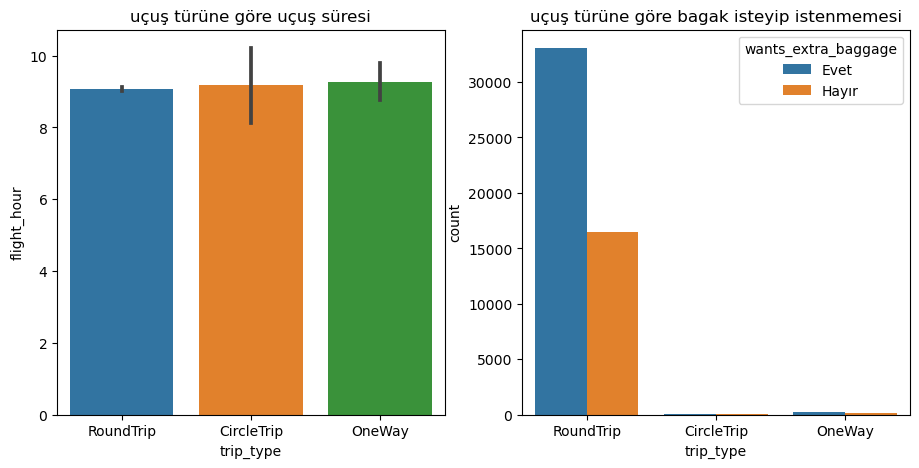

In [29]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sb.barplot(y=df.flight_hour,x=df.trip_type)
plt.title('uçuş türüne göre uçuş süresi')

plt.subplot(1,2,2)
sb.countplot(
    x="trip_type",
    hue="wants_extra_baggage",
    data=df.assign(wants_extra_baggage=df["wants_extra_baggage"].map({0: "Hayır", 1: "Evet"}))
)
plt.title("uçuş türüne göre bagaj isteyip istenmemesi")

---

# VERİ ÖNİŞLEME VE MODELLEME

In [4]:
df = pd.get_dummies(data=df,columns=['sales_channel'],drop_first=True) 
df = pd.get_dummies(data=df,columns=['trip_type'],drop_first=True) 
df = pd.get_dummies(data=df,columns=["flight_day"],drop_first=True)
df = df.drop(["route","booking_origin"],axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,False,False,True,False,False,False,False,False,True
3,1,96,31,4,0,0,1,5.52,0,False,False,True,False,True,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,False,False,True,False,False,False,False,False,True


In [5]:
x= df.drop("wants_extra_baggage",axis=1)
y= df["wants_extra_baggage"]

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=34)

In [7]:
scaler= StandardScaler().fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

## *Lojistik regresyon*

In [11]:
log_model= LogisticRegression(solver="liblinear").fit(x_train,y_train)
predicts= log_model.predict(x_test)
accuracy_score(y_test, predicts)

0.71176

In [12]:
cross_val_score(LogisticRegression(solver="liblinear"),x_train,y_train,cv=10).mean()

0.7074400000000001

parametre optimizasyonu

In [7]:
log_reg = LogisticRegression()
lr_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_lr = GridSearchCV(estimator=log_reg, param_grid=lr_params, n_jobs=-1, verbose=2)
grid_lr.fit(x_train_scaled, y_train)
y_pred = grid_lr.predict(x_test_scaled)
f1_lr = f1_score(y_test,y_pred)

print("En iyi parametreler:", grid_lr.best_params_)
print("En iyi F1 skoru:", f'{f1_lr:.4}')

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
En iyi parametreler: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
En iyi F1 skoru: 0.8071


In [20]:
best_log= LogisticRegression(C=0.1,max_iter=100,penalty="l1",solver="saga",tol=0.01)

In [21]:
best_log_score=cross_val_score(best_log,x_train_scaled,y_train,cv=10).mean()

In [22]:
best_log_score

0.7074933333333333

## *Naive Bayes*

In [11]:
naive_model= GaussianNB().fit(x_train_scaled, y_train)
preds_naive= naive_model.predict(x_test_scaled)
accuracy_score(y_test, preds_naive)

0.66496

In [12]:
cross_val_score(GaussianNB(),x_train_scaled,y_train,cv=10).mean()

0.6506133333333334

parametre optimizasyonu

In [13]:
naive_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid=naive_params, verbose = 1)
grid_nb.fit(x_train, y_train)


print("En iyi parametreler:", grid_nb.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
En iyi parametreler: {'var_smoothing': 1e-05}


In [19]:
best_nb= GaussianNB(var_smoothing=1e-05)
best_nb_score= cross_val_score(best_nb,x_train_scaled,y_train,cv=10).mean()
best_nb_score

0.6506133333333334

## *K-Nearest Neighbors*

In [15]:
knn_model= KNeighborsClassifier().fit(x_train_scaled,y_train)
preds_knn= knn_model.predict(x_test_scaled)

accuracy_score(y_test, preds_knn)

0.69096

In [16]:
cross_val_score(KNeighborsClassifier(),x_train_scaled,y_train,cv=10).mean()

0.6790133333333334

parametre optimizasyonu

In [17]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, n_jobs=-1, verbose=1)
grid_knn.fit(x_train,y_train)

print("En iyi parametreler:", grid_knn.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [18]:
best_knn= KNeighborsClassifier(metric='minkowski',n_neighbors=11,p=1,weights="distance")
best_knn_score= cross_val_score(best_knn, x_train_scaled,y_train,cv=10).mean()
best_knn_score

0.6949333333333333

## *Doğrusal Support Vector Machine*

In [8]:
svm_model= SVC(kernel="linear").fit(x_train_scaled,y_train)
svm_pred= svm_model.predict(x_test_scaled)
best_svm_score=accuracy_score(y_test,svm_pred)

In [11]:
best_svm_score= 0.67464

In [ ]:
# Çok uzun sürdüğü için parametre optimizasyonu yapamadım
svm_params={"C":np.arange(1,20)}
svm_mod= SVC(kernel="linear")
gs_svm= RandomizedSearchCV(svm_mod,svm_params,cv=5,n_jobs=-1).fit(x_train_scaled, y_train)

gs_svm.best_params_

## *Sinir Ağı*

In [19]:
scaler= StandardScaler().fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

ann_model= MLPClassifier().fit(x_train_scaled,y_train)
mlp_pred= ann_model.predict(x_test_scaled)
accuracy_score(y_test,mlp_pred)


0.72048

In [20]:
cross_val_score(MLPClassifier(),x_train_scaled,y_train,cv=5,n_jobs=-1).mean()

0.7213333333333334

parametre optimizasyonu

In [22]:
ann_params = {
    "alpha": [0.001, 0.01],
    "hidden_layer_sizes": [(64, 64), (32, 32)],
    "solver": ["adam"],
    "activation": ["relu", "tanh"]
}

ann_mod= MLPClassifier()
gs_ann= GridSearchCV(ann_mod, ann_params,cv=10,n_jobs=-1).fit(x_train_scaled,y_train)

print("En iyi parametreler:", gs_ann.best_params_)

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32, 32), 'solver': 'adam'}


In [12]:
best_ann= MLPClassifier(activation="relu",alpha=0.01,hidden_layer_sizes=(32,32),solver="adam")
best_ann_score= cross_val_score(best_ann,x_train_scaled,y_train,cv=5).mean()

## *Decision Tree*

In [12]:
cart_model= DecisionTreeClassifier().fit(x_train,y_train)
cart_pred= cart_model.predict(x_test)
accuracy_score(y_test,cart_pred)

0.6412

In [16]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=10,n_jobs=-1).mean()

0.6437333333333333

parametre optimizasyonu

In [24]:
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=dt, param_grid=dt_params, n_jobs=-1, verbose = 1)
grid_dt.fit(x_train, y_train)

print("En iyi parametreler:", grid_dt.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
En iyi parametreler: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [13]:
best_dt= DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=2,min_samples_split=2)
best_dt_score= cross_val_score(best_dt,x_train,y_train,cv=10).mean()
best_dt_score

0.7264800000000001

## *Random Forest*

In [17]:
rf_model= RandomForestClassifier().fit(x_train,y_train)
rf_pred= rf_model.predict(x_test)
accuracy_score(y_test,rf_pred)

0.71408

In [18]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=10,n_jobs=-1).mean()

0.7156

parametre optimizasyonu

In [27]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],            
    'bootstrap': [True, False] # 
}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, n_jobs=-1, verbose = 1)
grid_rf.fit(x_train, y_train)

print("En iyi parametreler:", grid_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
En iyi parametreler: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [14]:
best_rf= RandomForestClassifier(bootstrap=False,max_depth=10,min_samples_leaf=1,min_samples_split=5,n_estimators=200)
best_rf_score= cross_val_score(best_rf,x_train,y_train,cv=10).mean()
best_rf_score

0.7288800000000001

## *Gradient Boosting*

In [19]:
gb_model= GradientBoostingClassifier().fit(x_train,y_train)
gb_pred= gb_model.predict(x_test)
accuracy_score(y_test,gb_pred)

0.73168

In [20]:
cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=10,n_jobs=-1).mean()

0.72936

parametre optimizasyonu

In [31]:
gb_params={"learning_rate":[0.001,0.01,0.1],
           "n_estimators":[50,100,250],
           "min_samples_split":[2,7,10]}

gb_mod= GradientBoostingClassifier()
gs_gb= GridSearchCV(gb_mod, gb_params,cv=10,n_jobs=-1).fit(x_train,y_train)

print("En iyi parametreler:", gs_gb.best_params_)

En iyi parametreler: {'learning_rate': 0.1, 'min_samples_split': 7, 'n_estimators': 250}


In [15]:
best_gb= GradientBoostingClassifier(learning_rate=0.1,min_samples_split=7,n_estimators=250)
best_gb_score= cross_val_score(best_gb,x_train,y_train,cv=5).mean()

In [33]:
best_gb_score

0.7305333333333334

## *XGBoost*

In [21]:
xgb_model= XGBClassifier().fit(x_train,y_train)
xgb_pred= xgb_model.predict(x_test)
accuracy_score(y_test,xgb_pred)

0.72656

In [22]:
cross_val_score(XGBClassifier(),x_train,y_train,cv=10,n_jobs=-1).mean()

0.7233066666666665

parametre optimizasyonu

In [35]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False)

grid_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, n_jobs=-1, verbose = 1)
grid_xgb.fit(x_train, y_train)

print("En iyi parametreler:", grid_xgb.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
En iyi parametreler: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [16]:
best_xgb= XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=5,n_estimators=100,subsample=0.8)
best_xgb_score= cross_val_score(best_xgb,x_train,y_train,cv=10).mean()
best_xgb_score

0.7307733333333333

---

#### Kurduğumuz modelleri Barplot üzerinde karşılaştıralım

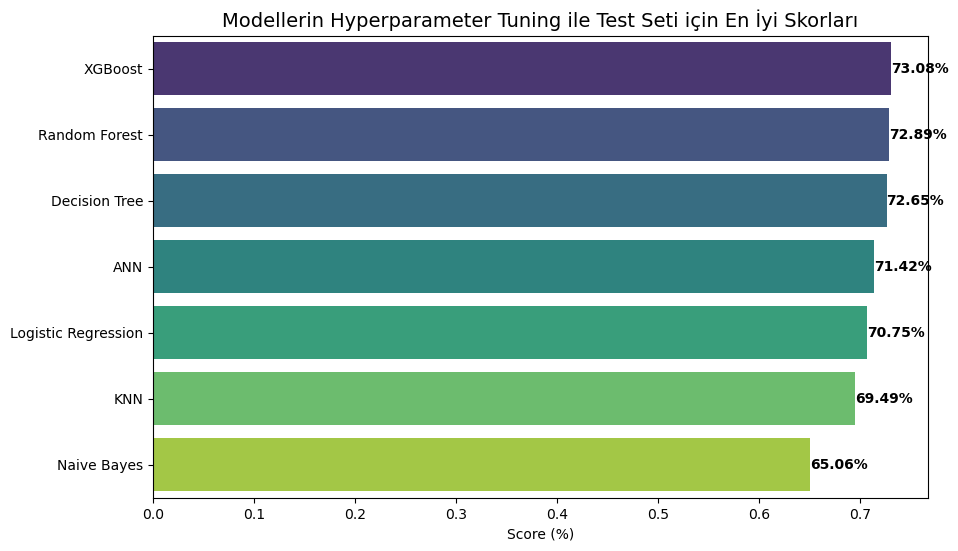

In [23]:
best_scores = {
    'Decision Tree': best_dt_score,
    'XGBoost': best_xgb_score,
    'Random Forest': best_rf_score,
    'Naive Bayes': best_nb_score,
    'KNN': best_knn_score,
    'Logistic Regression':best_log_score,
    "ANN": best_ann_score
}
tuned_f1df = pd.DataFrame.from_dict(best_scores, orient='index', columns=['Score'])
tuned_f1df = tuned_f1df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tuned_f1df['Score'],y=tuned_f1df.index, palette='viridis')
plt.title('Modellerin Hyperparameter Tuning ile Test Seti için En İyi Skorları', fontsize=14)
plt.xlabel('Score (%)')

for bar in ax.patches:
    width = bar.get_width() # Bar uzunlugu
    y = bar.get_y() + bar.get_height() / 2 # Barin ortasi
    ax.text(width,y,f'{width*100:.2f}%',
           ha = 'left',
           va = 'center',
           fontsize=10, color='black', weight='bold')
plt.show()

Modellerin **cross validation** yöntemi ile elde edilen sonuçlarına bakıldığı zaman, parametre optimizasyonları da yapılmış ve en iyi performans gösteren model XGBoost olarak gözüküyor fakat RandomForest ve DecisionTree modelleriyle de arasında çok bir fark yoktur. Bunun sonucunda verisetimizin ağaçlandırma yöntemleri ile elde edilen sonuçları daha iyi diye bir yorum yapabiliriz.